In [6]:
# Import required libraries

import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy import linalg as LA
from matplotlib import pyplot
from sklearn.decomposition import FactorAnalysis,PCA
from sklearn.cluster import KMeans
from scipy import stats

df = pd.read_excel("CarData1Lab.xlsx") #читаем данные, файл должен находиться в одной папке с данным блокнотом
#df.info() # инфо по столбцам, видим что есть столбцы в котором часть значений отсутствует
#df.isnull().sum() #количество пустых элементов в каждом из столбцов

df = df.dropna() # удаляем строки с пропусками
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 154
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        149 non-null    object 
 1   mpg         149 non-null    float64
 2   cylinders   149 non-null    int64  
 3   displace    149 non-null    int64  
 4   horsepower  149 non-null    float64
 5   accel       149 non-null    float64
 6   year        149 non-null    int64  
 7   weight      149 non-null    int64  
 8   origin      149 non-null    int64  
 9   make        149 non-null    object 
 10  model       149 non-null    object 
 11  price       149 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 15.1+ KB


In [7]:
# Ячейка печати считанного файла

# Функция для форматирования значения в соответствии с его типом
def format_value(val, width): # val -  исходное значение, width - ширина поля печати
    if isinstance(val, int):
        return f"{val:>{width}d}"
    elif isinstance(val, float):
        return f"{val:>{width}.1f}" # один знак после запятой (десятичной точки)
    elif isinstance(val, str):
        return val.ljust(width)[:width] # обрезание строки до заданной ширины
    else:
        return str(val).ljust(width)[:width]

data=df.query('year == 78 | year == 79')  # в данном случае отбираются только автомобили со страной производства с кодом 1 (США)
#data.info()
data_txt = data['name'] # имена объектов
#print(data_txt)
data1=data.drop(['make','model','origin'],axis=1) #удаляем столбцы с качественными переменными
print(data1)

# Определение ширину поля для текстового и числового столбца 
text_width = 17
number_width = 8

# Формирование и печать заголовка таблицы
header = ""
for col in data1.columns:
    width = text_width if data1[col].dtype == object else number_width
    header += col.ljust(width)[:width] + " "
print(header.strip())
print("-" * len(header))

# Перебор каждой строки DataFrame
for index, row in data1.iterrows():
    formatted_row = ""
    for col in data1.columns:
        width = text_width if isinstance(row[col], str) else number_width
        formatted_value = format_value(row[col], width)
        formatted_row += formatted_value + " "
    print(formatted_row.strip())

#data1 = data.drop(['make','model','name','origin'],axis=1)
data1 = data1.drop(['name'],axis=1)
#print(data1)


                    name   mpg  cylinders  displace  horsepower  accel  year  \
0   Volkswagen Rabbit Dl  43.1          4        90        48.0   21.5    78   
1            Ford Fiesta  36.1          4        98        66.0   14.4    78   
2       Mazda GLC Deluxe  32.8          4        78        52.0   19.4    78   
3         Datsun B210 GX  39.4          4        85        70.0   18.6    78   
4       Honda Civic CVCC  36.1          4        91        60.0   16.4    78   
..                   ...   ...        ...       ...         ...    ...   ...   
60           Fiat Strada  37.3          4        91        69.0   14.7    79   
61      Buick SkylarkLim  28.4          4       151        90.0   16.0    79   
62    Chevrolet Citation  28.8          6       173       115.0   11.3    79   
63      Oldsmobile Omega  26.8          6       173       115.0   12.9    79   
64       Pontiac Phoenix  33.5          4       151        90.0   13.2    79   

    weight  price  
0     1985   2400  

c:\Users\lavro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


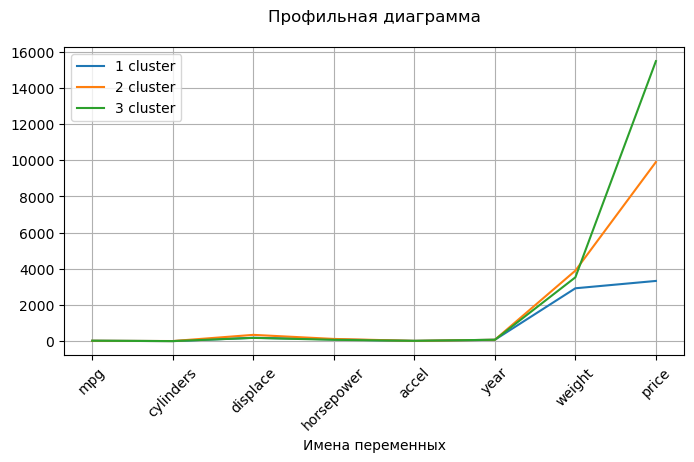

In [8]:
# Ячейка кластеризации методом к-средних исходных (нестандартизованных) данных

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs

a = int(input('Введите число кластеров___'))
labels = KMeans(n_clusters=a).fit(data1)
label = labels.labels_ # label - список, где хранятся метки кластеров 
#print('labels\n',label)

mean = labels.cluster_centers_ # массив с центрами кластеров
#print(mean)
k=mean.shape[1] #число переменных, описывающих объекты
xname = data1.columns

plt.figure(figsize = (8,4))

for i in range(a):
    plt.plot(xname, mean[i,:], label='{} cluster'.format(i+1))
    plt.legend()
plt.xlabel('Имена переменных')
plt.title('Профильная диаграмма\n')
plt.xticks(rotation=45)
plt.grid(True)




In [9]:
# Печать состава кластеров

def print_list_4_per_line(lst): # функция печати по 4 имени в строке
    max_length = max(len(item) for item in lst)
    for i in range(0, len(lst), 4):
        line = lst[i:i+4]
        numbered_line = [f"{i+j+1}. {item.ljust(max_length)}" for j, item in enumerate(line)]
        print(" ".join(numbered_line))

b = data1.shape        # b - размерность файла данных
#print(data_txt.shape)

for i in range (a): # цикл по числу кластеров
    print('\n',"="*80)
    print('\nСостав кластера с номером = ',i+1)
    print()
    datat = [] # здесь формируется состав очередного кластера
    #j1=1 # номера объектов в кластере
    for j in range (b[0]):
        if label[j] == i:
            datatxt = data_txt.iloc[j]
            datatxt1 = datatxt[:20] # обрезаем имя авто до 20 символов
            datat.append(datatxt1)
    print_list_4_per_line(datat)
           

        
    



Состав кластера с номером =  1

1. Volkswagen Rabbit Dl 2. Ford Fiesta          3. Mazda GLC Deluxe     4. Datsun B210 GX      
5. Honda Civic CVCC     6. Oldsmobile Cutlass   7. Dodge Diplomat       8. Mercury Monarch     
9. Pontiac Phoenix      10.  Chevrolet Malibu    11. Ford Fairmont A      12. Ford Fairmont M     
13. Plymouth Volare      14. AMC Concord          15. Buick Century        16. Mercury Zephyr      
17. Dodge Aspen          18. AMC Concord D1       19. Chevrolet  MonteCarl 20. RegalTurbo          
21. Ford Futura          22. Magnum XE            23. Chevrolet Chevette   24. Corona              
25. Datsun 510           26. Dodge Omni           27. Celica GT            28. Plymouth Sapporo    
29. Oldsmobile Starfire  30. Datsun  200-SX       31. Audi 5000            32. Volvo 264GL         
33. Saab 99GLE           34. Peugeot 604SL        35. Volkswagen  Scirocco 36. Honda  Accord LX    
37. Pontiac Lemans V6    38. Mercury  Zephyr 6    39. Ford   Fairmont 4    

x = np.arange(0,10)
print(x,mean[0,0])
#plt.plot(x[0],mean[x-1,1],color='g')


 Центры кластеров 
 [[ 1.408e+00 -9.630e-01 -1.149e+00 -1.278e+00  5.540e-01 -6.910e-01
  -1.361e+00 -5.400e-01]
 [-8.450e-01  1.185e+00  1.115e+00  1.306e+00 -9.150e-01 -8.910e-01
   8.490e-01 -2.200e-01]
 [-4.570e-01 -2.850e-01 -2.130e-01  1.100e-02  1.620e-01 -8.910e-01
   4.800e-02 -1.770e-01]
 [ 1.105e+00 -7.400e-01 -7.960e-01 -6.090e-01 -6.920e-01  1.106e+00
  -9.220e-01 -3.200e-01]
 [-4.700e-02  5.710e-01  8.800e-01  2.200e-02  1.172e+00  1.106e+00
   1.120e+00  4.666e+00]
 [-3.380e-01  8.900e-02  1.560e-01 -2.710e-01  1.255e+00  1.106e+00
   3.600e-01 -2.000e-03]
 [-1.041e+00  1.492e+00  1.564e+00  1.333e+00 -6.010e-01  1.106e+00
   1.411e+00  5.910e-01]]
Метки кластеров
 [0 0 0 0 0 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 2 2 0 2 2 2 2 2 2 2 2 0 0 5
 5 5 5 5 6 6 6 6 6 6 6 6 3 3 3 3 4 4 5 5 3 3 0 3 3 3 3 3]
(65,)
65 7
Стандартные отклонения переменных в каждом кластере = 
 [[0.621 0.    0.089 0.287 0.902 0.599 0.195 0.284]
 [0.143 0.531 0.353 0.545 0.5   0.    0.369 0.324]
 [0.436 

c:\Users\lavro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

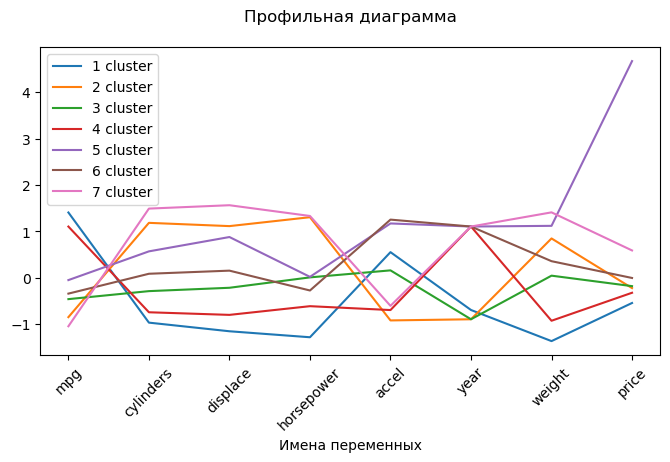

In [17]:
# Ячейка кластеризации со стандартизованными переменными

from sklearn.metrics import silhouette_score         # внутренние метрики кластеризации
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

data2 = (data1-data1.mean ())/data1.std()# стандартизация данных

#print('data1.mean(),data1.std()',data1.mean(),data1.std())
#print('data2: \n',data2.round(3))

S1 = data2.var()*(b[0]-1)#сумма квадратов отклонений от среднего исх.данных
S1sum = np.sum(S1) #сумма квадратов отклонений от общего цертра S0
#s1 = data1.std()

a1 = int(input('Введите число кластеров___'))
labels1 = KMeans(n_clusters=a1).fit(data2) # обращение к программе KMeans
#print(labels.labels_)
#print(round(labels.inertia_))
mean1 = labels1.cluster_centers_ #центры кластеров

k=mean1.shape[1] #число переменных, описывающих объекты
k1=mean1.shape[0] #число объектов в исходном файле
print("\n Центры кластеров \n",mean1.round(3))

name1 = labels1.labels_ # зто метки-индикаторы кластеров
print('Метки кластеров\n',name1)

b1 = data2.shape
print(data_txt.shape)
print(b1[0],a1)

sko = np.zeros((a1,k))# здесь будут храниться стандартные отклонения переменных по каждому кластеру
ss = np.zeros((a1))
vol_cluster = np.zeros(a1) # число объектов в каждом кластере
#print('ss start,sko = ',ss,sko)

for i in range(a1):     #цикл по кластерам
    for j1 in range(b1[0]):#цикл по объектам
        if name1[j1] == i:
            vol_cluster[i] = vol_cluster[i] + 1
            #print('vol_cluster',vol_cluster)
            for j in range(k): #цикл по переменным
                ss[i]= ss[i]+(data2.iloc[j1,j]-mean1[i,j])**2
                #print(i,j1,j)
                sko[i,j] = sko[i,j] + (data2.iloc[j1,j]-mean1[i,j])**2 
        #print(ss[i])
#print('vol_cluster,sko = ',vol_cluster,sko)

for i in range(a1): # цикл по кластерам
    for j in range(k): # цикл по переменным
        sko[i,j] = (sko[i,j]/vol_cluster[i])**0.5
print('Стандартные отклонения переменных в каждом кластере = \n',np.around(sko,decimals=3))
        
#print('Разброс внутри кластеров  ',ss,3)
print('\nРазброс внутри кластеров  ',np.around(ss,decimals=2))
print('Сумма квадратов отклонений от общего среднего SO = ',round(S1sum,3))
S2 = ss.sum() #сумма квадратов отклонений по кластерам S2 

#ss1 = ss.sum() #сумма квадратов отклонений по кластерам S2                  
print('Сумма квадратов отклонений по кластерам       S2 = ',round(S2,3))           

tt = 1-S2/S1sum
print('\n',"="*80)
print('Показатель качества кластеризации              Т = ',round(tt,3))

b = data1.shape        # b - размерность файла данных
#print(data_txt.shape)

for i in range (a1): # цикл по числу кластеров
    print('\n',"="*80)
    print('\nСостав кластера с номером = ',i+1)
    print()
    datat = [] # здесь формируется состав очередного кластера (имена объектов)
    #j1=1 # номера объектов в кластере
    for j in range (b[0]):
        if name1[j] == i:
            datatxt = data_txt.iloc[j]
            datatxt1 = datatxt[:17] # обрезаем имя авто до 20 символов
            datat.append(datatxt1)
            #print('datatxt,datatxt1',j,i,datatxt,datatxt1)
            #print(datat)
    print_list_4_per_line(datat)

#print(label,name1)
print('\n',"="*80)
print('*** Показатели качества кластеризации ***')
# Сравнение результатов кластеризации по критерию Рэнда стандартизованные и исходные переменные 
# Вычисление Adjusted Rand Index
ari = adjusted_rand_score(label,name1)
# Вывод значения ARI
print("\nAdjusted Rand Index (ARI) = ", round(ari,3),'-степень совпадения состава кластеров (исх. и станд. переменные)')    

#silhouette = silhouette_score(X, labels)
silhouette = silhouette_score(data2, name1)
print("Silhouette Score:", round(silhouette,3))

ch_index = calinski_harabasz_score(data2, name1)
print("Calinski-Harabasz Index:", round(ch_index,3))

db_index = davies_bouldin_score(data2, name1)
print("Davies-Bouldin Index:", round(db_index,3))


plt.clf()    
xname = data2.columns    
    
plt.figure(figsize = (8,4))

#print('a1 = ',a1)

for i in range(a1):
    plt.plot(xname, mean1[i,:], label='{} cluster'.format(i+1))
    #print('xname, mean[i,:]',xname,mean1[i,:])
    plt.legend()
plt.xlabel('Имена переменных')
plt.title('Профильная диаграмма\n')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()
    
    
#plt.figure(figsize = (10,6))



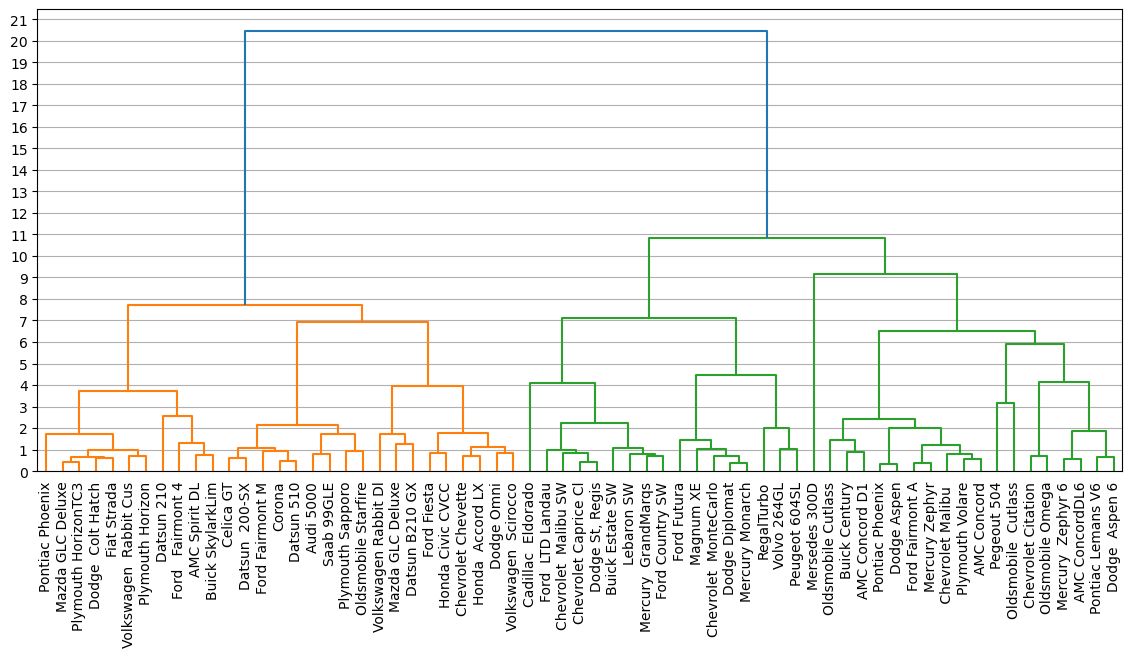

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.ticker import MultipleLocator

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
#varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
data2.index = data_txt
#print('data2.index = ',data2.index)

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(data2, method='ward')

#print('\nmergings',mergings)
plt.figure(figsize=(14,6))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(data_txt), #имена объектов
           leaf_rotation=90,  #поворот имен объектов на 90 (вертикально)
           leaf_font_size=10, #размер шрифта с именами объектов
           #truncate_mode='level',
           #p=2
           )

# Устанавливаем интервал основных линий сетки по оси Y
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
# Включаем горизонтальные линии сетки
plt.grid(axis='y')
plt.show()





Оценка совпадения состава раздельного и иерархического кластеров по критерию ARI
     Adjusted Rand Index (ARI) =  0.118


Состав кластера с номером =  1

1. Volkswagen Rabbit Dl 2. Ford Fiesta          3. Mazda GLC Deluxe     4. Datsun B210 GX      
5. Honda Civic CVCC     6. Ford Fairmont M      7. Chevrolet Chevette   8. Corona              
9. Datsun 510           10. Dodge Omni           11. Celica GT            12. Plymouth Sapporo    
13. Oldsmobile Starfire  14. Datsun  200-SX       15. Audi 5000            16. Saab 99GLE          
17. Volkswagen  Scirocco 18. Honda  Accord LX     19. Ford   Fairmont 4    20. Volkswagen  Rabbit C
21. Mazda GLC Deluxe     22. Dodge  Colt Hatch    23. AMC Spirit DL        24. Plymouth Horizon    
25. Plymouth HorizonTC3  26. Datsun 210           27. Fiat Strada          28. Buick SkylarkLim    
29. Pontiac Phoenix     


Состав кластера с номером =  2

1. Oldsmobile Cutlass   2. Dodge Diplomat       3. Mercury Monarch      4. Pontiac Phoenix    

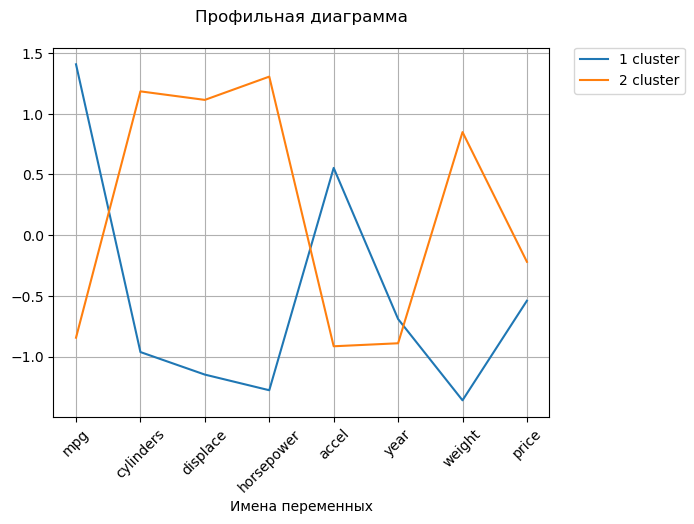

In [18]:
from scipy.cluster.hierarchy import fcluster,cut_tree
from scipy import cluster
from matplotlib.ticker import MultipleLocator

#max_d = float(input('Введите уровень сечения дендрограммы___'))
ncl = int(input('Введите число кластеров для заданного сечения___'))

clusters = fcluster(mergings, t=ncl, criterion='maxclust')

Z = cluster.hierarchy.ward(data2)
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=ncl) #cutree - метки кластеров после разрезания
#print('Z:\n',Z,'\ncutree:\n',cutree)
#print('cutree\n  ',cutree)

lbl_hierar = [sublist[0] for sublist in cutree] # в lbl_hierar хранится одномерная версия cutree 
#print('lbl_hierar',lbl_hierar)

# Сравним совпадение по составу кластеров раздельного и иерархического кластеров по критерию ARI
# Вычисление Adjusted Rand Index
ari = adjusted_rand_score(name1,lbl_hierar)
# Вывод значения ARI
print('\nОценка совпадения состава раздельного и иерархического кластеров по критерию ARI')
print("     Adjusted Rand Index (ARI) = ", round(ari,3))    

#print('число кластеров = ',ncl)

b = data1.shape        # b - размерность файла данных
#print(data_txt.shape)

for i in range (ncl): # цикл по числу кластеров
    print('\n',"="*80)
    print('\nСостав кластера с номером = ',i+1)
    print()
    datat = [] # здесь формируется состав очередного кластера
    #j1=1 # номера объектов в кластере
    for j in range (b[0]):
        if lbl_hierar[j] == i:
            datatxt = data_txt.iloc[j]
            datatxt1 = datatxt[:20] # обрезаем имя авто до 20 символов
            datat.append(datatxt1)
    print_list_4_per_line(datat)
                       
            
    # Профильная диаграмма
for i in range(ncl):
    plt.plot(xname, mean1[i,:], label='{} cluster'.format(i+1))
    plt.legend()
    plt.xlabel('Имена переменных')
    plt.title('Профильная диаграмма\n')
    plt.xticks(rotation=45) 
    plt.legend(bbox_to_anchor=( 1.05 , 1 ), loc='upper left', borderaxespad= 0 )
plt.grid(True)


    